MinMax normalization is used to bring all values into a defined range (e.g. [0,1])

It is also called unity-based normalization

Calculation (for range [0,1]): x‘ =  (𝑥−min⁡(𝑥))/(max⁡(𝑥)−min⁡(𝑥))

scikit-learn provides the MinMaxScaler class to perform MinMax normalization (Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [1]:
from sklearn import preprocessing
import numpy as np

data = [[ 250, -100,  200],
     [ 200,  0,  0],
     [ 0,  100, -100]]


# class sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True)
# __init__(self, feature_range=(0, 1), *, copy=True)[source]
#Initialize self. See help(type(self)) for accurate signature.
scaler = preprocessing.MinMaxScaler()

#fit(self, X, y=None)[source]
#Compute the minimum and maximum to be used for later scaling.
print(scaler.fit(data))

print("Max values: ",scaler.data_max_)
print("Min values: ",scaler.data_min_)

# transform(self, X)
#Scale features of X according to feature_range.
normed_data = scaler.transform(data)

print(normed_data)

#Perform normalization for a single data point
print("Scaled data point [200, 0, 30]: ",scaler.transform([[200, 0, 30]]))

MinMaxScaler()
Max values:  [250. 100. 200.]
Min values:  [   0. -100. -100.]
[[1.         0.         1.        ]
 [0.8        0.5        0.33333333]
 [0.         1.         0.        ]]
Scaled data point [200, 0, 30]:  [[0.8        0.5        0.43333333]]


MinMax normalization can be generalized to restrict the range of values in the dataset between any arbitrary points a and b

General calculation: x‘ =a+((𝑥−min⁡(𝑥))(𝑏−𝑎))/(max⁡(𝑥)−min⁡(𝑥))

Let‘s restrict the values in the given example to alternative ranges:


In [3]:
#Range [-1;1]
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

print(scaler.fit(data))

print("Max values: ",scaler.data_max_)
print("Min values: ",scaler.data_min_)

normed_data = scaler.transform(data)

print(normed_data)

MinMaxScaler(feature_range=(-1, 1))
Max values:  [250. 100. 200.]
Min values:  [   0. -100. -100.]
[[ 1.         -1.          1.        ]
 [ 0.6         0.         -0.33333333]
 [-1.          1.         -1.        ]]


In [4]:
#Range [0;100]
scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))

print(scaler.fit(data))

print("Max values: ",scaler.data_max_)
print("Min values: ",scaler.data_min_)

normed_data = scaler.transform(data)

print(normed_data)

MinMaxScaler(feature_range=(0, 100))
Max values:  [250. 100. 200.]
Min values:  [   0. -100. -100.]
[[100.           0.         100.        ]
 [ 80.          50.          33.33333333]
 [  0.         100.           0.        ]]


Standardization is an alternative scaling method and typically rescales data to have a specific mean and standard deviation of 1 

The standard score (also called Z score) corresponds to the number of standard deviations by which the value of a raw score (observed value) is above or below the mean attribute value

Raw scores above the mean have positive standard scores, raw scores below the mean have negative standard scores

Calculation: z = (x − μ) /σ 
    
    where μ is the mean of the population and σ is the standard deviation of the population
    
scikit-learn provides the StandardScaler class to perform Z-score standardization (Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [5]:
data = [[ 250, -100,  200],
     [ 200,  0,  0],
     [ 0,  100, -100]]
print("Original data: ",data)

#class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)
# __init__(self, *, copy=True, with_mean=True, with_std=True)
#Initialize self. See help(type(self)) for accurate signature
scaler = preprocessing.StandardScaler()

#fit(self, X[, y])
#Compute the mean and std to be used for later scaling.
scaler.fit(data)

#Attribute holding the mean value for each feature in the training set
print("Mean values: ",scaler.mean_)
#Attribute holding the variance value for each feature in the training set
print("Variance values: ",scaler.var_)
#Attribute holding the standard deviation for each feature in the training set
print("Standard deviation values: ",scaler.scale_)

#transform(self, X[, copy])
#Perform standardization by centering and scaling of original (list) data
print("Scaled data: ",scaler.transform(data))

#Perform standardization for a single data point
print("Scaled data point [200, 0, 30]: ",scaler.transform([[200, 0, 30]]))

Original data:  [[250, -100, 200], [200, 0, 0], [0, 100, -100]]
Mean values:  [150.           0.          33.33333333]
Variance values:  [11666.66666667  6666.66666667 15555.55555556]
Standard deviation values:  [108.01234497  81.64965809 124.72191289]
Scaled data:  [[ 0.9258201  -1.22474487  1.33630621]
 [ 0.46291005  0.         -0.26726124]
 [-1.38873015  1.22474487 -1.06904497]]
Scaled data point [200, 0, 30]:  [[ 0.46291005  0.         -0.02672612]]


In a variation of Z standardization, outlier effects are reduced by using the absolute standard deviation instead of the regular standard deviation

Absolute standard deviation (x) = 1/n  ∑|xi − μ|

Let's build a small function to implement this variation:

In [ ]:
####### not covered any longer in lecture ############

import pandas as pd  

def calc_mean_abs_variance(np_data):
    #Data needs to be 2-dim numpy array
    #Pandas provides a method to make Calculation of MAD (Mean Absolute Deviation) 
    #MAD is defined as average distance between each value and mean.
    
    #creating empty mad series 
    series_mad=[]
    for column in range(0,len(np_data[0,:])):
        #transform to pandas series and grab one column of the 2-dim array
        series_column = pd.Series(np_data[:,column])
        # calling .mad() method to calculate mean absolute deviation
        series_mad.append(series_column.mad())
    return series_mad

data = [[ 250, -100,  200],
     [ 200,  0,  0],
     [ 0,  100, -100]]
print("Original data: ",data)

#init scaler
scaler = preprocessing.StandardScaler()

#fit(self, X[, y])
#Compute the mean and std to be used for later scaling.
scaler.fit(data)

#Attribute holding the var value used for standardization
print("Scale / Standard Deviation values: ",scaler.scale_)

#Transform to Numpy Array for easier handling/ access columns directly
np_2dim_data=np.array(data)

#Calculate Mean Abs Std values
series_mad_values= calc_mean_abs_variance(np_2dim_data)

#Replace std/scale by mad values 
scaler.scale_=series_mad_values
print("Adapted Scale / Standard Deviation values: ",scaler.scale_)

#transform(self, X[, copy])
#Perform standardization by centering and scaling of original (list) data
print("Scaled data: ",scaler.transform(data))

Alternative Scaling Algorithms - MaxAbsScaler

The MaxAbsScaler works very similarly to MinMaxScaler but automatically scales the data to a [-1,1] range based on the absolute maximum

Is meant for data that is already centered at zero or sparse data

Does not shift/center the data, and thus does not destroy sparsity

x’ = x /max(abs(x)) 

In [ ]:
####### not covered any longer in lecture ############

data = [[ 250, -100,  200],
     [ 200,  0,  0],
     [ 0,  100, -100]]
print("Original data: ",data)

#class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)
# __init__(self, *, copy=True, with_mean=True, with_std=True)
#Initialize self. See help(type(self)) for accurate signature
scaler = preprocessing.MaxAbsScaler()

#fit(self, X[, y])
#Compute the mean and std to be used for later scaling.
scaler.fit(data)

#Attribute holding maximum absolute value per feature
print("Maximum absolute value per feature: ",scaler.max_abs_)

#transform(self, X[, copy])
#Perform standardization by centering and scaling of original (list) data
print("Scaled data: ",scaler.transform(data))

#Perform standardization for a single data point
print("Scaled data point [200, 0, 30]: ",scaler.transform([[200, 0, 30]]))

Alternative Scaling Algorithms - RobustScaler

If data contains many outliers, scaling using the mean and standard deviation is often not working well

In these cases RobustScaler removes median and scales the data according to the quantile range.

x’ = (x  −𝑚𝑒𝑑𝑖𝑎𝑛 (𝑥)) / IQR (x)

    , with IQR (x) = 75th percentile (x) — 25th percentile (x)


In [7]:
data = [[ 250, -100,  200],
     [ 200,  0,  0],
     [ 0,  100, -100]]
print("Original data: ",data)

#class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)
# __init__(self, *, copy=True, with_mean=True, with_std=True)
#Initialize self. See help(type(self)) for accurate signature
scaler = preprocessing.RobustScaler()

#fit(self, X[, y])
#Compute the mean and std to be used for later scaling.
scaler.fit(data)

#The median value for each feature in the training set.
print("Median value for each feature: ",scaler.center_)

#The (scaled) interquartile range for each feature in the training set.  
print("Interquartile range for each feature: ",scaler.scale_)
  
#transform(self, X[, copy])
#Perform standardization by centering and scaling of original (list) data
print("Scaled data: ",scaler.transform(data))

#Perform standardization for a single data point
print("Scaled data point [200, 0, 30]: ",scaler.transform([[200, 0, 30]]))

Original data:  [[250, -100, 200], [200, 0, 0], [0, 100, -100]]
Median value for each feature:  [200.   0.   0.]
Interquartile range for each feature:  [125. 100. 150.]
Scaled data:  [[ 0.4        -1.          1.33333333]
 [ 0.          0.          0.        ]
 [-1.6         1.         -0.66666667]]
Scaled data point [200, 0, 30]:  [[0.  0.  0.2]]


Original data - both features:  [[ 237    0   17  112   15]
 [5000  -10    0  200  130]]
Original data - feature without outlier: 


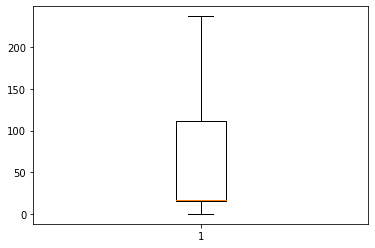


Original data - feature with outlier: 


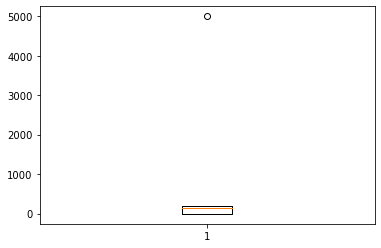

Median value for each feature:  [ 17. 112.]
Interquartile range for each feature:  [185. 130.]
Transformed data - feature without outlier: 
[ 1.18918919  0.         -0.01081081 -0.14594595  0.98918919]


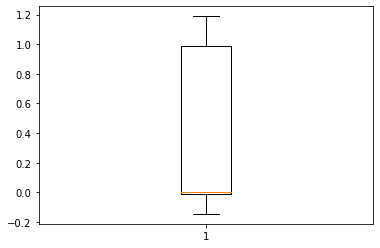

Transformed data - feature with outlier: 
[-0.86153846  0.         37.6        -0.86153846  0.13846154]


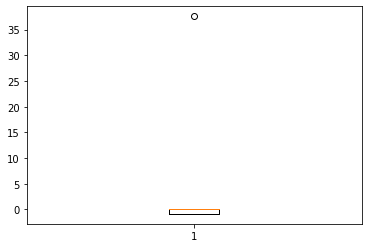

In [81]:
import matplotlib.pyplot as plt

#Slightly adapted example to show that this also works with outliers
data = [[ 237,  0,17,112,15], [5000,-10,0,200,130]]
data =np.asarray(data)
print("Original data - both features: ",data)

print("Original data - feature without outlier: ")

plt.boxplot(data[0])
plt.show()

print("\nOriginal data - feature with outlier: ")

plt.boxplot(data[1])
plt.show()

scaler = preprocessing.RobustScaler()
scaler.fit(data.reshape(-1,2))

#Tfeature he median value for each feature in the training set.
print("Median value for each feature: ",scaler.center_)

#The (scaled) interquartile range for each feature in the training set.  
print("Interquartile range for each feature: ",scaler.scale_)

trans_data=scaler.transform(data.reshape(-1,2))
#trans_list=trans_data.tolist()

print("Transformed data - feature without outlier: ")
print(trans_data[:,0])
plt.boxplot(trans_data[:,0])
plt.show()

print("Transformed data - feature with outlier: ")
print(trans_data[:,1])
plt.boxplot(trans_data[:,1])
plt.show()